In [1]:
import cirq
import numpy as np
from cirq_superstaq import Service, AceCRPlusMinus, AceCR

In [2]:
service = Service(api_key="YOUR API KEY")

In [3]:
qubits = cirq.LineQubit.range(2)

In [4]:
circuit = cirq.Circuit(AceCRPlusMinus(qubits[0], qubits[1]))

In [5]:
circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

In [ ]:
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")

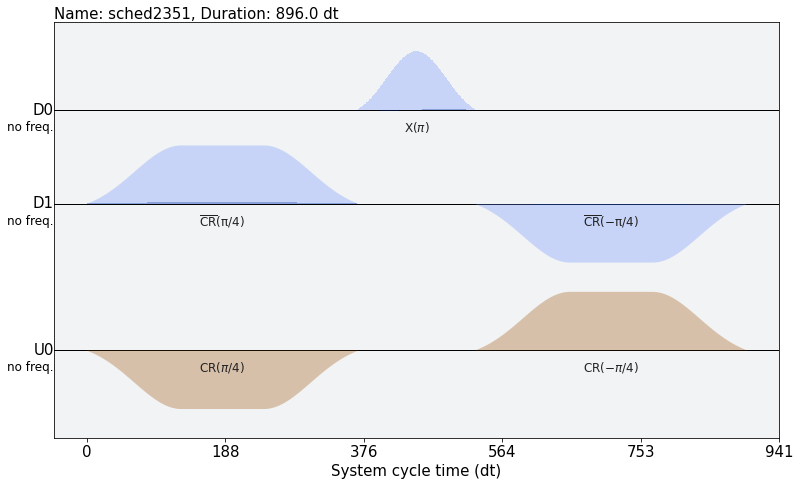

In [7]:
out.draw();

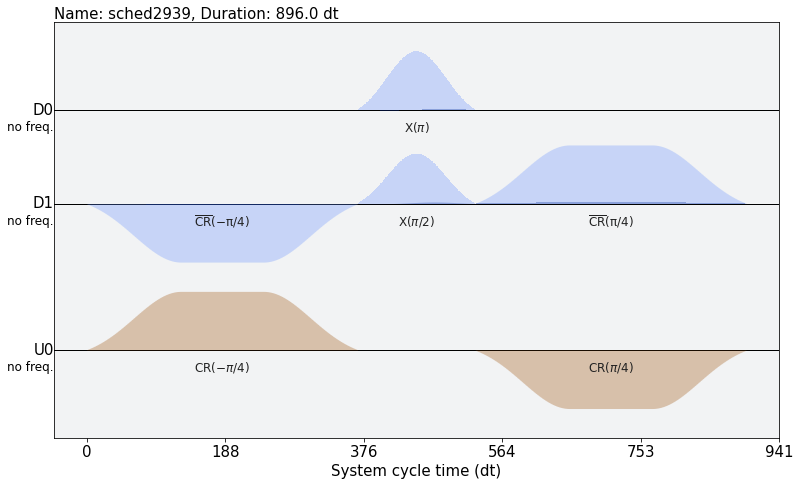

In [10]:
circuit = cirq.Circuit(AceCR("-+", np.pi / 2)(qubits[0], qubits[1]))
out = service.ibmq_compile(circuit, target="ibmq_jakarta_qpu")
out.draw();